In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 10.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# Download Berkshire Hathaway stock data
berkshire = yf.download('BRK-A')['Adj Close']

# Download S&P 500 front month futures data
sp500_futures = yf.download('ES=F')['Adj Close']

# Compute latest starting date
berkshire_start_date = berkshire.index[0]
sp500_start_date = sp500_futures.index[0]
latest_start_date = max(berkshire_start_date, sp500_start_date)

# Use only data starting from the latest starting data, so that we have the same data points for both series
berkshire = berkshire.loc[latest_start_date:]
sp500_futures = sp500_futures.loc[latest_start_date:]

# Calculate daily logarithmic returns
berkshire['Log_Returns'] = np.log(berkshire/berkshire.shift(1))
sp500_futures['Log_Returns'] = np.log(sp500_futures/sp500_futures.shift(1))

# Compute excess returns
excess_returns = berkshire['Log_Returns'] - sp500_futures['Log_Returns']

# Annualize excess returns
annualized_excess_return = excess_returns.mean() * 252
tracking_error = excess_returns.std() * np.sqrt(252)

# Calculate the Information Ratio
information_ratio = annualized_excess_return / tracking_error
print()
print()
print("Information Ratio: ", information_ratio)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Information Ratio:  0.26752377953245277


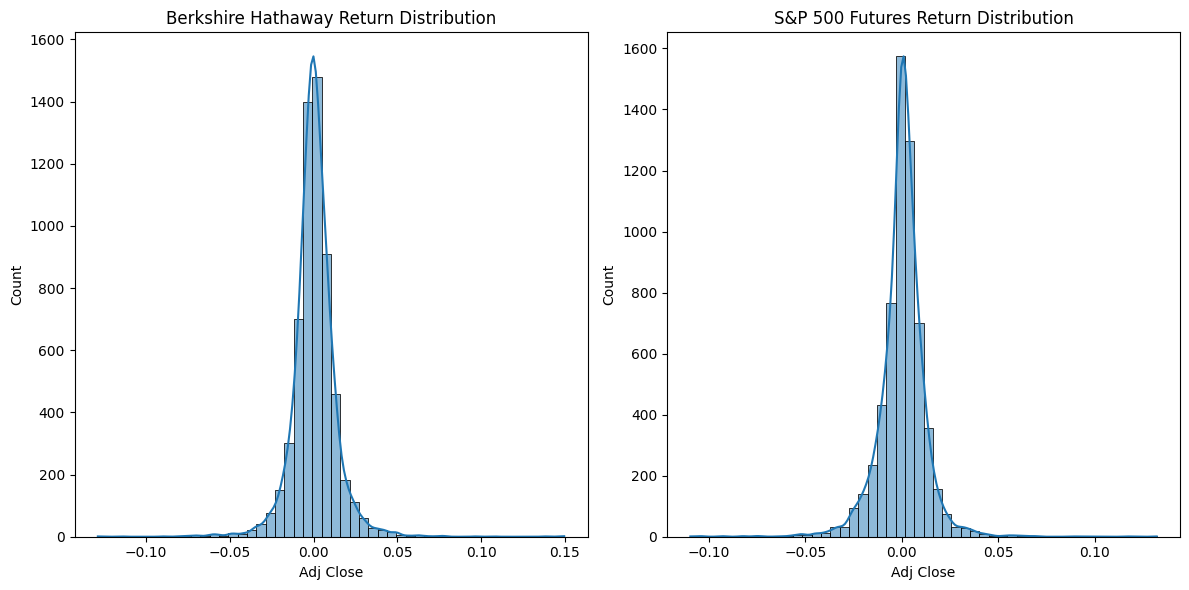

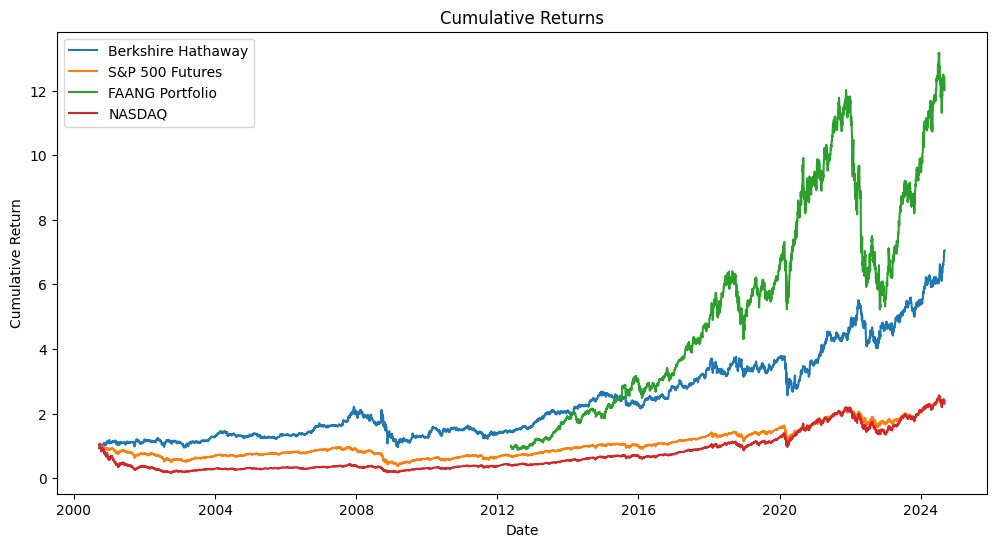

In [ ]:
# return distributions

import seaborn as sns

# Plot histograms of returns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(berkshire['Log_Returns'].dropna(), bins=50, kde=True)
plt.title('Berkshire Hathaway Return Distribution')

plt.subplot(1, 2, 2)
sns.histplot(sp500_futures['Log_Returns'].dropna(), bins=50, kde=True)
plt.title('S&P 500 Futures Return Distribution')

plt.tight_layout()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))

plt.plot((1 + berkshire['Log_Returns'].dropna()).cumprod(), label='Berkshire Hathaway')
plt.plot((1 + sp500_futures['Log_Returns'].dropna()).cumprod(), label='S&P 500 Futures')
plt.plot((1 + portfolio_returns).cumprod(), label='FAANG Portfolio')
plt.plot((1 + nasdaq_returns).cumprod(), label='NASDAQ')

plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


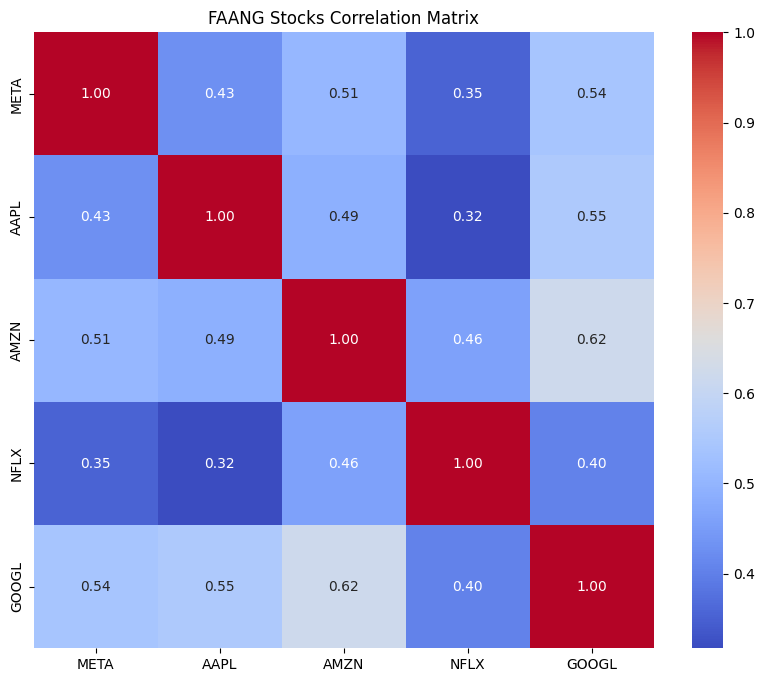

In [ ]:
# Calculate correlation matrix
correlation_matrix = faang_returns.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('FAANG Stocks Correlation Matrix')
plt.show()


In [ ]:
# statistical tests

from scipy.stats import ttest_1samp

# Perform t-test on portfolio returns
t_stat, p_value = ttest_1samp(portfolio_returns, 0)

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("The mean return is significantly different from zero.")
else:
    print("The mean return is not significantly different from zero.")


t-statistic: 3.16
p-value: 0.002
The mean return is significantly different from zero.


Iteration:      1,   Func. Count:      6,   Neg. LLF: 19554.936900985296
Iteration:      2,   Func. Count:     16,   Neg. LLF: 237152803493.53458
Iteration:      3,   Func. Count:     24,   Neg. LLF: 6804.807671057993
Iteration:      4,   Func. Count:     31,   Neg. LLF: 7380.939572390715
Iteration:      5,   Func. Count:     38,   Neg. LLF: 5647.94263322998
Iteration:      6,   Func. Count:     44,   Neg. LLF: 5636.378895088183
Iteration:      7,   Func. Count:     49,   Neg. LLF: 5636.378399747578
Iteration:      8,   Func. Count:     54,   Neg. LLF: 5636.3783906762765
Iteration:      9,   Func. Count:     58,   Neg. LLF: 5636.378390677959
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5636.3783906762765
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:             

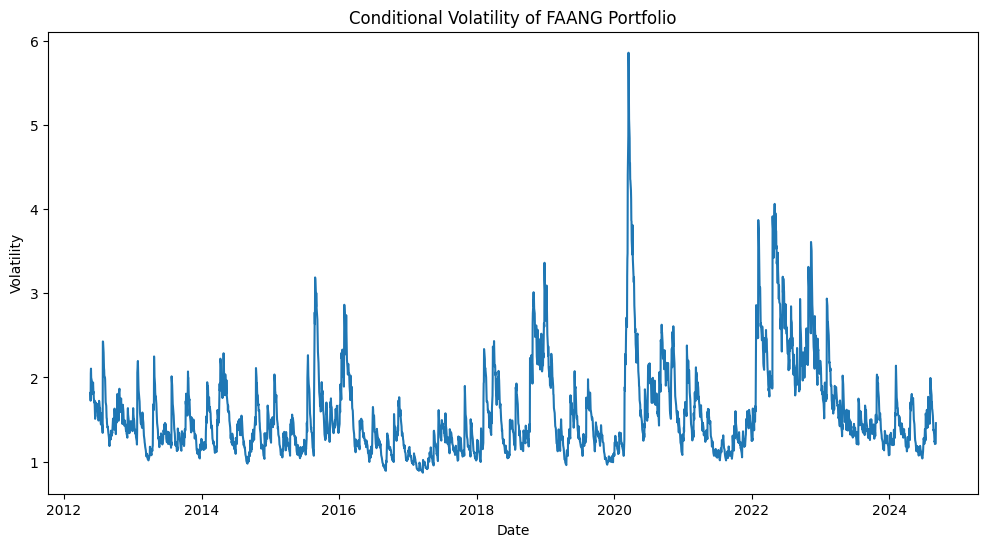

In [ ]:
# volatility clustering (GARCH model)

from arch import arch_model

# Fit GARCH model to FAANG portfolio returns
model = arch_model(portfolio_returns * 100, vol='Garch', p=1, q=1)
model_fit = model.fit()

print(model_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(model_fit.conditional_volatility)
plt.title('Conditional Volatility of FAANG Portfolio')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()
